In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd


rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
matplotlib.rcParams.update({'font.size': 12})

In [2]:
# практические скорострельности, делаем допущение, что войска однородны
lamda_1 = 3.1
lamda_2 = 3
p_1 = 0.6
p_2 = 0.6
a_1 = lamda_1 * p_1
a_2 = lamda_2 * p_2

In [3]:
# Начальные численности сторон в вершинах
# номер стороны, номер вершины
N1_10_start = 1000
N2_10_start = 1000

N1_20_start = 1000
N2_20_start = 1000

N1_30_start = 1000
N2_30_start = 1000

In [4]:
# время, необхдимое для переброски из одной вершины в другую
t_travel = {'1-2':1e-2, '2-1':1e-2,
           '2-3':1e-2, '3-2':1e-2,
           '1-3':1e-2,'3-1':1e-2}

In [5]:
# доля допустимых потерь для стороны 1,2 в вершине 1-3
share_of_casualties_for_retreat_1_1 = 0.5
share_of_casualties_for_retreat_2_1 = 0.5

share_of_casualties_for_retreat_1_2 = 0.15
share_of_casualties_for_retreat_2_2 = 0.15

share_of_casualties_for_retreat_1_3 = 0.001
share_of_casualties_for_retreat_2_3 = 0.001

In [6]:
tau = 0 # общее время
dt = 1e-2 # шаг по времени

# Начальные численности сторон в вершинах
# номер стороны, номер вершины
N1_10 = N1_10_start
N2_10 = N2_10_start
N1_20 = N1_20_start
N2_20 = N2_20_start
N1_30 = N1_30_start
N2_30 = N2_30_start

# Текущие численности сторон в вершинах
# номер стороны, номер вершины
N1_1 = N1_10
N2_1 = N2_10
N1_2 = N1_20
N2_2 = N2_20
N1_3 = N1_30
N2_3 = N2_30


t_arr = np.array([tau])
N1_1_arr = np.array([N1_1])
N2_1_arr = np.array([N2_1])
N1_2_arr = np.array([N1_2])
N2_2_arr = np.array([N2_2])
N1_3_arr = np.array([N1_3])
N2_3_arr = np.array([N2_3])

# флаг отступила ли сторона
# номер стороны, номер вершины
flag_of_retreat = {'1-1':0, '2-1':0,
                  '1-2':0, '2-2':0,
                  '1-3':0, '2-3':0}

# матрица управляющих воздействий
# номер стороны, номер вершины, направление
matrix_of_travels = {'1-1-2':0, '2-1-2':0,
                    '1-1-3':0, '2-1-3':0,
                    
                    '1-2-1':0, '2-2-1':0,
                    '1-2-3':0, '2-2-3':0,
                    
                    '1-3-1':0, '2-3-1':0,
                    '1-3-2':0, '2-3-2':0}

# Матрица времени ожидаемых подкреплений
# Номер стороны, номер выршины, направление
t_of_expected_reinforcments = {'1_1-2':0, '2_1-2':0,
                               '1_1-3':0, '2_1-3':0,
                    
                               '1_2-1':0, '2_2-1':0,
                               '1_2-3':0, '2_2-3':0,
                    
                               '1_3-1':0, '2_3-1':0,
                               '1_3-2':0, '2_3-2':0}

# матрица отступлений, исторические данные
# Номер стороны, номер выршины
matrix_of_retreats = {'1-1':0, '2-1':0,
                  '1-2':0, '2-2':0,
                  '1-3':0, '2-3':0}

while (tau <= 1e5) and ((N1_1 + N1_2 + N1_3 > 1) and (N2_1 + N2_2 + N2_3 > 1)):
    tau += dt

    # Расчет порога для отступления
    N1_1_for_retreat = N1_10 * share_of_casualties_for_retreat_1_1
    N2_1_for_retreat = N2_10 * share_of_casualties_for_retreat_2_1
    N1_2_for_retreat = N1_20 * share_of_casualties_for_retreat_1_2
    N2_2_for_retreat = N2_20 * share_of_casualties_for_retreat_2_2
    N1_3_for_retreat = N1_30 * share_of_casualties_for_retreat_1_3
    N2_3_for_retreat = N2_30 * share_of_casualties_for_retreat_2_3
    
    
    # приход подкреплений
    if round(tau, 5) == round(t_of_expected_reinforcments['1_1-2'], 5):
        t_of_expected_reinforcments['1_1-2'] = 0
        N1_20 += N1_1
        N1_2 += N1_1
        N1_1 = 0
        N2_1 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['2_1-2'], 5):
        t_of_expected_reinforcments['2_1-2'] = 0
        N2_20 += N2_1
        N2_2 += N2_1
        N2_1 = 0
        N1_1 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['1_1-3'], 5):
        t_of_expected_reinforcments['1_1-3'] = 0
        N1_30 += N1_1
        N1_3 += N1_1
        N1_1 = 0
        N2_1 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['2_1-3'], 5):
        t_of_expected_reinforcments['2_1-3'] = 0
        N2_30 += N2_1
        N2_3 += N2_1
        N2_1 = 0
        N1_1 = 0
        

    if round(tau, 5) == round(t_of_expected_reinforcments['1_2-1'], 5):
        t_of_expected_reinforcments['1_2-1'] = 0
        N1_10 += N1_2
        N1_1 += N1_2
        N1_2 = 0
        N2_2 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['2_2-1'], 5):
        t_of_expected_reinforcments['2_2-1'] = 0
        N2_10 += N2_2
        N2_1 += N2_2
        N1_2 = 0
        N2_2 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['1_2-3'], 5):
        t_of_expected_reinforcments['1_2-3'] = 0
        N1_30 += N1_2
        N1_3 += N1_2
        N1_2 = 0
        N2_2 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['2_2-3'], 5):
        t_of_expected_reinforcments['2_2-3'] = 0
        N2_30 += N2_2
        N2_3 += N2_2
        N1_2 = 0
        N2_2 = 0
        
        
    if round(tau, 5) == round(t_of_expected_reinforcments['1_3-1'], 5):
        t_of_expected_reinforcments['1_3-1'] = 0
        N1_10 += N1_3
        N1_1 += N1_3
        N1_3 = 0
        N2_3 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['2_3-1'], 5):
        t_of_expected_reinforcments['2_3-1'] = 0
        N2_10 += N2_3
        N2_1 += N2_3
        N1_3 = 0
        N2_3 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['1_3-2'], 5):
        t_of_expected_reinforcments['1_3-2'] = 0
        N1_20 += N1_3
        N1_2 += N1_3
        N1_3 = 0
        N2_3 = 0
    if round(tau, 5) == round(t_of_expected_reinforcments['2_3-2'], 5):
        t_of_expected_reinforcments['2_3-2'] = 0
        N2_20 += N2_3
        N2_20 += N2_3
        N1_3 = 0
        N2_3 = 0

    # Расчет текущей численности сторон            
    dN1_1 = -a_2 * N2_1 * N1_1/N1_10 * dt
    dN2_1 = -a_1 * N1_1 * N2_1/N2_10 * dt
    dN1_2 = -a_2 * N2_2 * N1_2/N1_20 * dt
    dN2_2 = -a_1 * N1_2 * N2_2/N2_20 * dt
    dN1_3 = -a_2 * N2_3 * N1_3/N1_30 * dt
    dN2_3 = -a_1 * N1_3 * N2_3/N2_30 * dt
    
    
    N1_1 += dN1_1
    N2_1 += dN2_1
    N1_2 += dN1_2
    N2_2 += dN2_2
    N1_3 += dN1_3
    N2_3 += dN2_3
    
    t_arr = np.append(t_arr, tau)
    N1_1_arr = np.append(N1_1_arr, N1_1)
    N2_1_arr = np.append(N2_1_arr, N2_1)
    N1_2_arr = np.append(N1_2_arr, N1_2)
    N2_2_arr = np.append(N2_2_arr, N2_2)
    N1_3_arr = np.append(N1_3_arr, N1_3)
    N2_3_arr = np.append(N2_3_arr, N2_3)
    
    # Проверка было ли отступление
    if (N1_1 <= N1_1_for_retreat) and (matrix_of_retreats['1-1'] == 0):
        flag_of_retreat['1-1'] = 1
        N1_1 = 0
        matrix_of_retreats['1-1'] = 1
    if (N2_1 <= N2_1_for_retreat) and (matrix_of_retreats['2-1'] == 0):
        flag_of_retreat['2-1'] = 1
        N2_1 = 0
        matrix_of_retreats['2-1'] = 1
    if (N1_2 <= N1_2_for_retreat) and (matrix_of_retreats['1-2'] == 0):
        flag_of_retreat['1-2'] = 1
        N1_2 = 0
        matrix_of_retreats['1-2'] = 1
    if (N2_2 <= N2_2_for_retreat) and (matrix_of_retreats['2-2'] == 0):
        flag_of_retreat['2-2'] = 1
        N2_2 = 0
        matrix_of_retreats['2-2'] = 1
    if (N1_3 <= N1_3_for_retreat) and (matrix_of_retreats['1-3'] == 0):
        flag_of_retreat['1-3'] = 1
        N1_3 = 0
        matrix_of_retreats['1-3'] = 1
    if (N2_3 <= N2_3_for_retreat) and (matrix_of_retreats['2-3'] == 0):
        flag_of_retreat['2-3'] = 1
        N2_3 = 0
        matrix_of_retreats['2-3'] = 1
        
    # Управляющее воздействие для переброски подкреплений
    # Условие:
    # В приорите получает подкрепление сторона, которая понесла большие потери
    # Если потери равны, подкрепления идут в вершину, с наим. времени пути
    if flag_of_retreat['1-1'] == 1:
        flag_of_retreat['1-1'] = 0
        if N2_2/N2_20 < N2_3/N2_30 and N2_2 !=0:
            matrix_of_travels['2-1-2'] = 1
        elif N2_3/N2_30 < N2_2/N2_20 and N2_3 !=0:
            matrix_of_travels['2-1-3'] = 1
        elif N2_2 == 0:
            matrix_of_travels['2-1-3'] = 1
        elif N2_3 == 0:
            matrix_of_travels['2-1-2'] = 1
        elif round(N2_2/N2_20) == round(N2_3/N2_30) and N2_2 != 0 and N2_3 != 0:
            if t_travel['1-2'] <= t_travel['1-3']:
                matrix_of_travels['2-1-2'] = 1
            else:
                matrix_of_travels['2-1-3'] = 1
        elif N2_2 == 0:
            matrix_of_travels['2-1-3'] = 1
        elif N2_3 == 0:
            matrix_of_travels['2-1-2'] = 1
                
    if flag_of_retreat['2-1'] == 1:
        flag_of_retreat['2-1'] = 0
        if N1_2/N1_20 < N1_3/N1_30 and N1_2 !=0:
            matrix_of_travels['1-1-2'] = 1
        elif N1_3/N1_30 < N1_2/N1_20 and N1_3 !=0:
            matrix_of_travels['1-1-3'] = 1
        elif round(N1_2/N1_20) == round(N1_3/N1_30) and N1_2 != 0 and N1_3 != 0:
            if t_travel['1-2'] <= t_travel['1-3']:
                matrix_of_travels['1-1-2'] = 1
            else:
                matrix_of_travels['1-1-3'] = 1
        elif N1_2 == 0:
            matrix_of_travels['1-1-3'] = 1
        elif N1_3 == 0:
            matrix_of_travels['1-1-2'] = 1
        
    if flag_of_retreat['1-2'] == 1:
        flag_of_retreat['1-2'] = 0
        if N2_1/N2_10 < N2_3/N2_30 and N2_1 != 0:
            matrix_of_travels['2-2-1'] = 1
        elif N2_3/N2_30 < N2_1/N2_10 and N2_3 != 0:
            matrix_of_travels['2-2-3'] = 1
        elif round(N2_1/N2_10) == round(N2_3/N2_30) and N2_1 != 0 and N2_3 != 0:
            if t_travel['2-1'] <= t_travel['2-3']:
                matrix_of_travels['2-2-1'] = 1
            else:
                matrix_of_travels['2-2-3'] = 1
        elif N2_1 == 0:
            matrix_of_travels['2-2-3'] = 1
        elif N2_3 == 0:
            matrix_of_travels['2-2-1'] = 1

    if flag_of_retreat['2-2'] == 1:
        flag_of_retreat['2-2'] = 0
        if N1_1/N1_10 < N1_3/N1_30 and N1_1 != 0:
            matrix_of_travels['1-2-1'] = 1
        elif N1_3/N1_30 < N1_1/N1_10 and N1_3 != 0:
            matrix_of_travels['1-2-3'] = 1
        elif round(N1_1/N1_10) == round(N1_3/N1_30) and N1_1 != 0 and N1_3 != 0:
            if t_travel['2-1'] <= t_travel['2-3']:
                matrix_of_travels['1-2-1'] = 1
            else:
                matrix_of_travels['1-2-3'] = 1
        elif N1_1 == 0:
            matrix_of_travels['1-2-3'] = 1
        elif N1_3 == 0:
            matrix_of_travels['1-2-1'] = 1
                
    if flag_of_retreat['1-3'] == 1:
        flag_of_retreat['1-3'] = 0
        if N2_1/N2_10 < N2_2/N2_20 and N2_1 != 0:
            matrix_of_travels['2-3-1'] = 1
        elif N2_2/N2_20 < N2_1/N2_10 and N2_2 != 0:
            matrix_of_travels['2-3-2'] = 1
        elif round(N2_1/N2_10) == round(N2_2/N2_20) and N2_1 != 0 and N2_2 != 0:
            if t_travel['3-1'] <= t_travel['3-2']:
                matrix_of_travels['2-3-1'] = 1
            else:
                matrix_of_travels['2-3-2'] = 1
        elif N2_1 == 0:
            matrix_of_travels['2-3-2'] = 1
        elif N2_2 == 0:
            matrix_of_travels['2-3-1'] = 1
                
    if flag_of_retreat['2-3'] == 1:
        flag_of_retreat['2-3'] = 0
        if N1_1/N1_10 < N1_2/N1_20 and N1_1 != 0:
            matrix_of_travels['1-3-1'] = 1
        elif N1_2/N1_20 < N1_1/N1_10 and N1_2 != 0:
            matrix_of_travels['1-3-2'] = 1
        elif round(N1_1/N1_10) == round(N1_2/N1_20) and N1_1 != 0 and N1_2 != 0:
            if t_travel['3-1'] <= t_travel['3-2']:
                matrix_of_travels['1-3-1'] = 1
            else:
                matrix_of_travels['1-3-2'] = 1
        elif N1_1 == 0:
            matrix_of_travels['1-3-2'] = 1
        elif N1_2 == 0:
            matrix_of_travels['1-3-1'] = 1

    # Расчет времени прибытия подкреплений
    if matrix_of_travels['2-1-2'] == 1:
        matrix_of_travels['2-1-2'] = 0
        t_of_expected_reinforcments['2_1-2'] = tau + t_travel['1-2']
        
    if matrix_of_travels['2-1-3'] == 1:
        matrix_of_travels['2-1-3'] = 0
        t_of_expected_reinforcments['2_1-3'] = tau + t_travel['1-3']
        
    if matrix_of_travels['1-1-2'] == 1:
        matrix_of_travels['1-1-2'] = 0
        t_of_expected_reinforcments['1_1-2'] = tau + t_travel['1-2']
        
    if matrix_of_travels['1-1-3'] == 1:
        matrix_of_travels['1-1-3'] = 0
        t_of_expected_reinforcments['1_1-3'] = tau + t_travel['1-3']
        
    if matrix_of_travels['2-2-1'] == 1:
        matrix_of_travels['2-2-1'] = 0
        t_of_expected_reinforcments['2_2-1'] = tau + t_travel['2-1']
        
    if matrix_of_travels['2-2-3'] == 1:
        matrix_of_travels['2-2-3'] = 0
        t_of_expected_reinforcments['2_2-3'] = tau + t_travel['2-3']
        
    if matrix_of_travels['1-2-1'] == 1:
        matrix_of_travels['1-2-1'] = 0
        t_of_expected_reinforcments['1_2-1'] = tau + t_travel['2-1']
        
    if matrix_of_travels['1-2-3'] == 1:
        matrix_of_travels['1-2-3'] = 0
        t_of_expected_reinforcments['1_2-3'] = tau + t_travel['2-3']
        
    if matrix_of_travels['2-3-1'] == 1:
        matrix_of_travels['2-3-1'] = 0
        t_of_expected_reinforcments['2_3-1'] = tau + t_travel['3-1']
        
    if matrix_of_travels['2-3-2'] == 1:
        matrix_of_travels['2-3-2'] = 0
        t_of_expected_reinforcments['2_3-2'] = tau + t_travel['3-2']
        
    if matrix_of_travels['1-3-1'] == 1:
        matrix_of_travels['1-3-1'] = 0
        t_of_expected_reinforcments['1_3-1'] = tau + t_travel['3-1']
        
    if matrix_of_travels['1-3-2'] == 1:
        matrix_of_travels['1-3-2'] = 0
        t_of_expected_reinforcments['1_3-2'] = tau + t_travel['3-2']

Text(0.5, 1.0, 'Вершина 3')

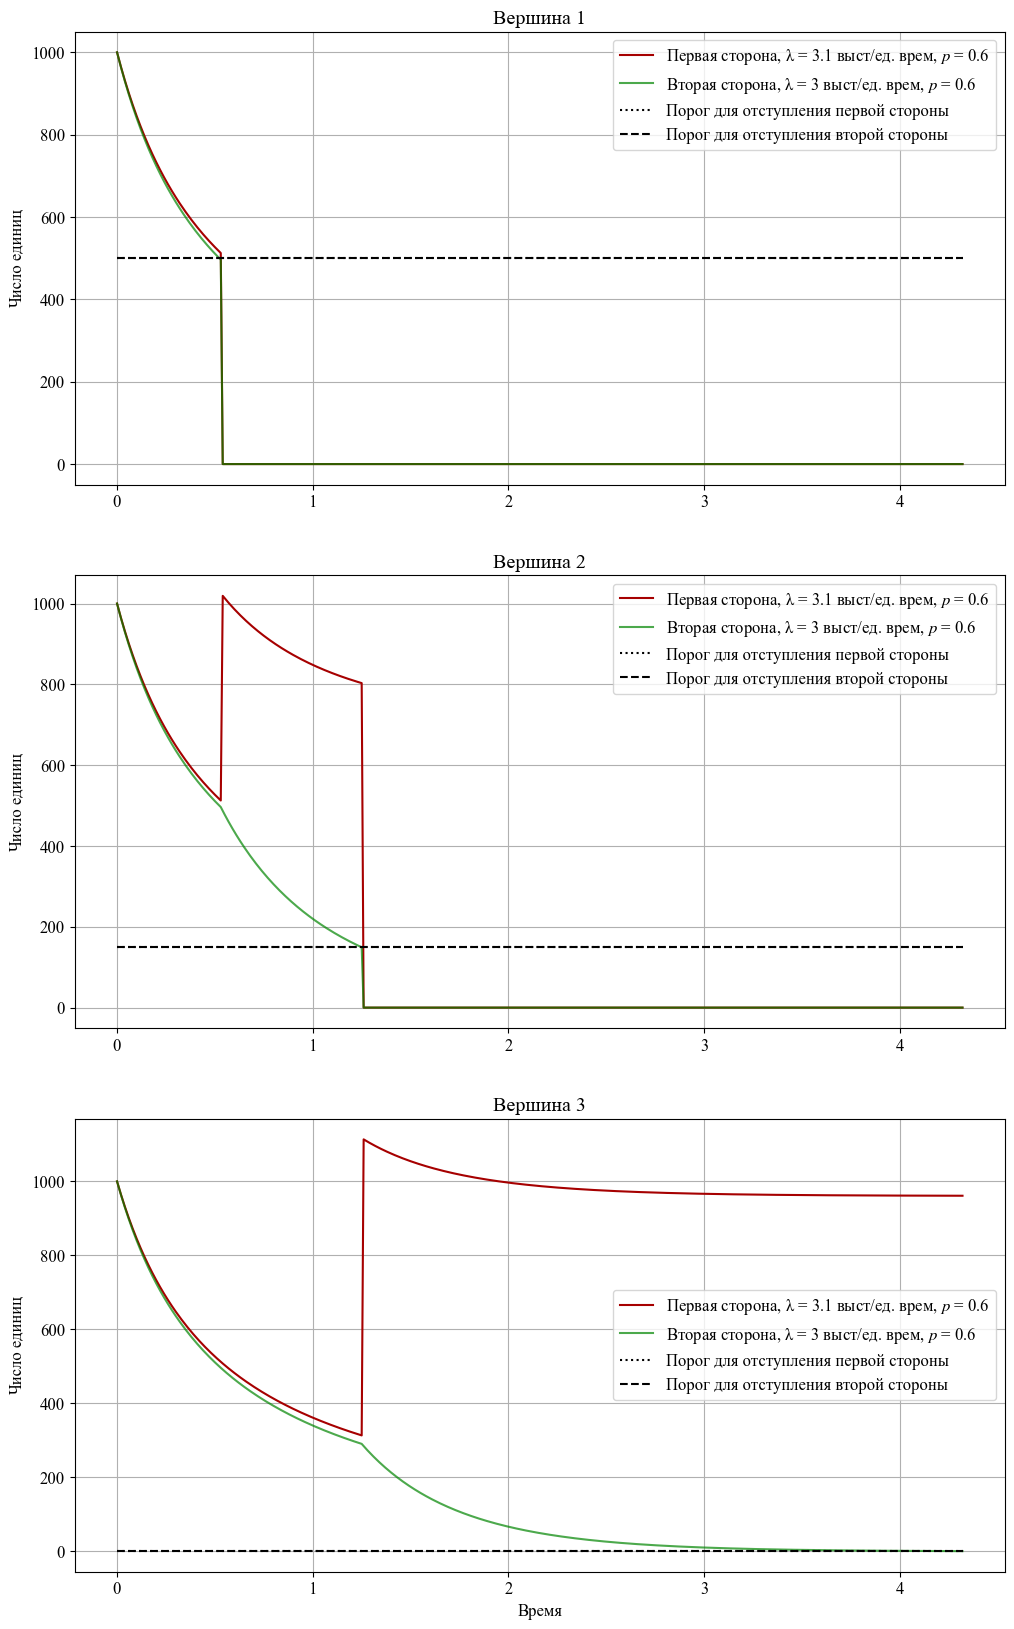

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3)

fig.set_size_inches(12, 20)

ax1.plot(t_arr, N1_1_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
ax1.plot(t_arr, N2_1_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500', alpha=0.7)
ax1.plot([t_arr[0], t_arr[-1]], [N1_10_start*share_of_casualties_for_retreat_1_1, N1_10_start*share_of_casualties_for_retreat_1_1], linestyle=':', color='black', label='Порог для отступления первой стороны')
ax1.plot([t_arr[0], t_arr[-1]], [N2_10_start*share_of_casualties_for_retreat_2_1, N2_10_start*share_of_casualties_for_retreat_2_1], linestyle='--', color='black', label='Порог для отступления второй стороны')
ax1.grid()
ax1.legend()
ax1.set_ylabel('Число единиц')
ax1.set_title('Вершина 1')

ax2.plot(t_arr, N1_2_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
ax2.plot(t_arr, N2_2_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500', alpha=0.7)
ax2.plot([t_arr[0], t_arr[-1]], [N1_20_start*share_of_casualties_for_retreat_1_2, N1_20_start*share_of_casualties_for_retreat_1_2], linestyle=':', color='black', label='Порог для отступления первой стороны')
ax2.plot([t_arr[0], t_arr[-1]], [N2_20_start*share_of_casualties_for_retreat_2_2, N2_20_start*share_of_casualties_for_retreat_2_2], linestyle='--', color='black', label='Порог для отступления второй стороны')
ax2.grid()
ax2.legend()
ax2.set_ylabel('Число единиц')
ax2.set_title('Вершина 2')


ax3.plot(t_arr, N1_3_arr, label='Первая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_1, p_1), color='#A60000')
ax3.plot(t_arr, N2_3_arr, label='Вторая сторона, λ = {} выст/ед. врем, $p$ = {}'.format(lamda_2, p_2), color='#008500', alpha=0.7)
ax3.plot([t_arr[0], t_arr[-1]], [N1_30_start*share_of_casualties_for_retreat_1_3, N1_30_start*share_of_casualties_for_retreat_1_3], linestyle=':', color='black', label='Порог для отступления первой стороны')
ax3.plot([t_arr[0], t_arr[-1]], [N2_30_start*share_of_casualties_for_retreat_2_3, N2_30_start*share_of_casualties_for_retreat_2_3], linestyle='--', color='black', label='Порог для отступления второй стороны')
ax3.grid()
ax3.legend()
ax3.set_ylabel('Число единиц')
ax3.set_xlabel('Время')
ax3.set_title('Вершина 3')